# MEPs in diseased vs healthy mice

In [95]:
from tqdm import tqdm
from mepextract.extracting import Extractor
from mepextract.extracting import Viewer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import os
import pickle
import json

plt.style.use(['science', 'grid', 'vibrant'])

## defining relevant folders and paths

In [24]:
test = '/Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials Test/MICE_EEG_2024 (93-102).csv'
full = '/Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials Test/MICE_EEG_2024 (93-257).csv'

spreadsheet = pd.read_csv(full)

master_folder = '/Volumes/STORAGE 1.0/UNIC Research/Motor Evoked Potentials/MEPSSEP_raw_data/post 93'
test_folder = '/Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials Test'

spreadsheet

,session,animalID,cage,ear,phenotype,phenoCode,subrec,sessionClass,sessionType,currentLevel,stim_lvl,isoflo,trials_from,trials_to,notes
0,2024-03-07_18-03-10,A571,NaN,NaN,5XFAD,2.0,1.0,MEP,sciatic,1.49,thr,1.9,1.0,60,'A571 sciatic at threshold of 1.49mA 50us pulse'
1,2024-03-07_18-04-31,A571,NaN,NaN,5XFAD,2.0,1.0,MEP,sciatic,2.25,1.5x,1.9,1.0,60,'A571 sciatic at 1.5x thr 2.25mA 50us pulse'
2,2024-03-07_18-11-10,A571,NaN,NaN,5XFAD,2.0,1.0,MEP,spine_hump,2.25,thr,1.9,1.0,60,'A571 spine hump at thr 2.75mA 200us pulse'
3,2024-03-07_18-12-24,A571,NaN,NaN,5XFAD,2.0,1.0,MEP,spine_hump,4.12,1.5x,1.9,1.0,60,'A571 spine hump at 1.5xthr 4.12mA 200us pulse'
4,2024-03-07_18-26-03,A573,NaN,NaN,5XFAD,2.0,1.0,MEP,sciatic,3.37,thr,1.9,1.0,60,'A573 sciatic at 3.37mA 50us pulseA573 sciatic...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,2024-03-09_17-48-26,A572,NaN,NaN,5XFAD,2.0,1.0,MEP,skull_needles,6.00,max,1.9,1.0,60,'A572 LECB skull 6mA 200us 5 pulses'
161,2024-03-09_17-53-55,A571,NaN,NaN,5XFAD,2.0,1.0,MEP,skull_needles,4.14,thr,1.9,1.0,60,'A571 RECB skull 4.14mA 200us 5 pulses'
162,2024-03-09_17-55-40,A571,NaN,NaN,5XFAD,2.0,1.0,MEP,skull_needles,6.20,1.5x,1.9,1.0,60,'A571 RECB skull 6.2mA 200us 5 pulses'
163,2024-03-09_18-06-40,A573,NaN,NaN,5XFAD,2.0,1.0,MEP,skull_needles,3.00,thr,1.9,1.0,60,'A573 thr skull 3mA 5 pulses 200usA573 thr sku...


## extracting MEP matrices for all trials

In [ ]:
# list to store each trial
sampling_rate = 30000

all_extracted = []

n = len(spreadsheet)
for i in tqdm(range(0, n), desc="Processing trials"):
    if spreadsheet['sessionType'][i] == 'reject':
        continue
    else:
        # relevant information
        notes = spreadsheet.loc[i]
        
        # defining extractor object
        extractor = Extractor(
            master_folder=master_folder, 
            notes=notes,
            recording_channels=[5, 7],
            sampling_rate=sampling_rate,
            pre_stimulus_ms=10,
            post_stimulus_ms=100)
        
        # extracting relevant data
        extracted = extractor.lazy(event_channel=13, export=True)
    
        all_extracted.append(extracted)

In [ ]:
# saving extracted data
with open('/Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials Test/extracted.pkl', 'wb') as f:
    pickle.dump(all_extracted, f)

In [2]:
# loading extracted data
extract_location = '/Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials Test/extracted.pkl'

with open(extract_location, 'rb') as f:
    extracted = pickle.load(f)

## trial classification and peak detection

In [116]:
viewer = Viewer(extracted = extracted, sampling_rate=30000)

viewer.classifier()

Output()

HTML(value='<br>')

Output(layout=Layout(height='1000', width='95%'))

HTML(value='<br>')

In [16]:
# accepted = viewer.accepted
# unsure = viewer.unsure
# rejected = viewer.rejected
# 
# accepted_indices = viewer.accepted_indices
# unsure_indices = viewer.unsure_indices
# rejected_indices = viewer.rejected_indices
# 
# classified_indices = {'accepted': accepted_indices, 'unsure': unsure_indices, 'rejected': rejected_indices}
# 
# with open('/Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials Test/accepted.pkl', 'wb') as f:
#     pickle.dump(accepted, f)
# 
# with open('/Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials Test/unsure.pkl', 'wb') as f:
#     pickle.dump(unsure, f)
#     
# with open('/Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials Test/rejected.pkl', 'wb') as f:
#     pickle.dump(rejected, f)
#     
# with open('/Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials Test/classified_indices.pkl', 'wb') as f:
#     pickle.dump(classified_indices, f)


In [ ]:
with open('/Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials Test/accepted.pkl', 'rb') as f:
    accepted = pickle.load(f)

with open('/Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials Test/unsure.pkl', 'rb') as f:
    unsure = pickle.load(f)

with open('/Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials Test/unsure.pkl', 'rb') as f:
    classified_indices = pickle.load(f)

## peak selection (first detected peak)

In [124]:
accepted[0].keys()

accepted[0]['event_mean'].mean(axis=1)

array([-0.19082882, -0.11717197])

In [129]:
selected = accepted + unsure

final = []

for trial in selected:

    group = int(trial['notes']['phenoCode'])
    stim_type = trial['notes']['sessionType']
    positive_peaks = trial.get('positive peaks')
    negative_peaks = trial.get('negative peaks')

    if positive_peaks and negative_peaks:
        
        positive_peaks = sorted(positive_peaks, key=lambda x: x[0])
        negative_peaks = sorted(negative_peaks, key=lambda x: x[0])
        
        delay_pos, amplitude_pos = positive_peaks[0]
        delay_neg, amplitude_neg = negative_peaks[0]
        
        delay_pos = (delay_pos / 30) - 10  # convert to milliseconds
        delay_neg = (delay_neg / 30) - 10  # convert to milliseconds
        
        delay = np.abs(delay_pos - delay_neg)
        amplitude = amplitude_pos + amplitude_neg
        
        if amplitude > 100:
            final.append({'delay':delay, 'amplitude': amplitude, 'group': group, 'stim_type': stim_type})
    else:
        continue
    

final = pd.DataFrame(final)

final.head()

,delay,amplitude,group,stim_type
0,0.333333,119.064564,1,sciatic
1,0.366667,146.527212,2,spine_hump
2,0.333333,64.468063,2,spine_hump
3,0.500000,243.177105,2,spine_hump
4,0.466667,518.847916,1,sciatic


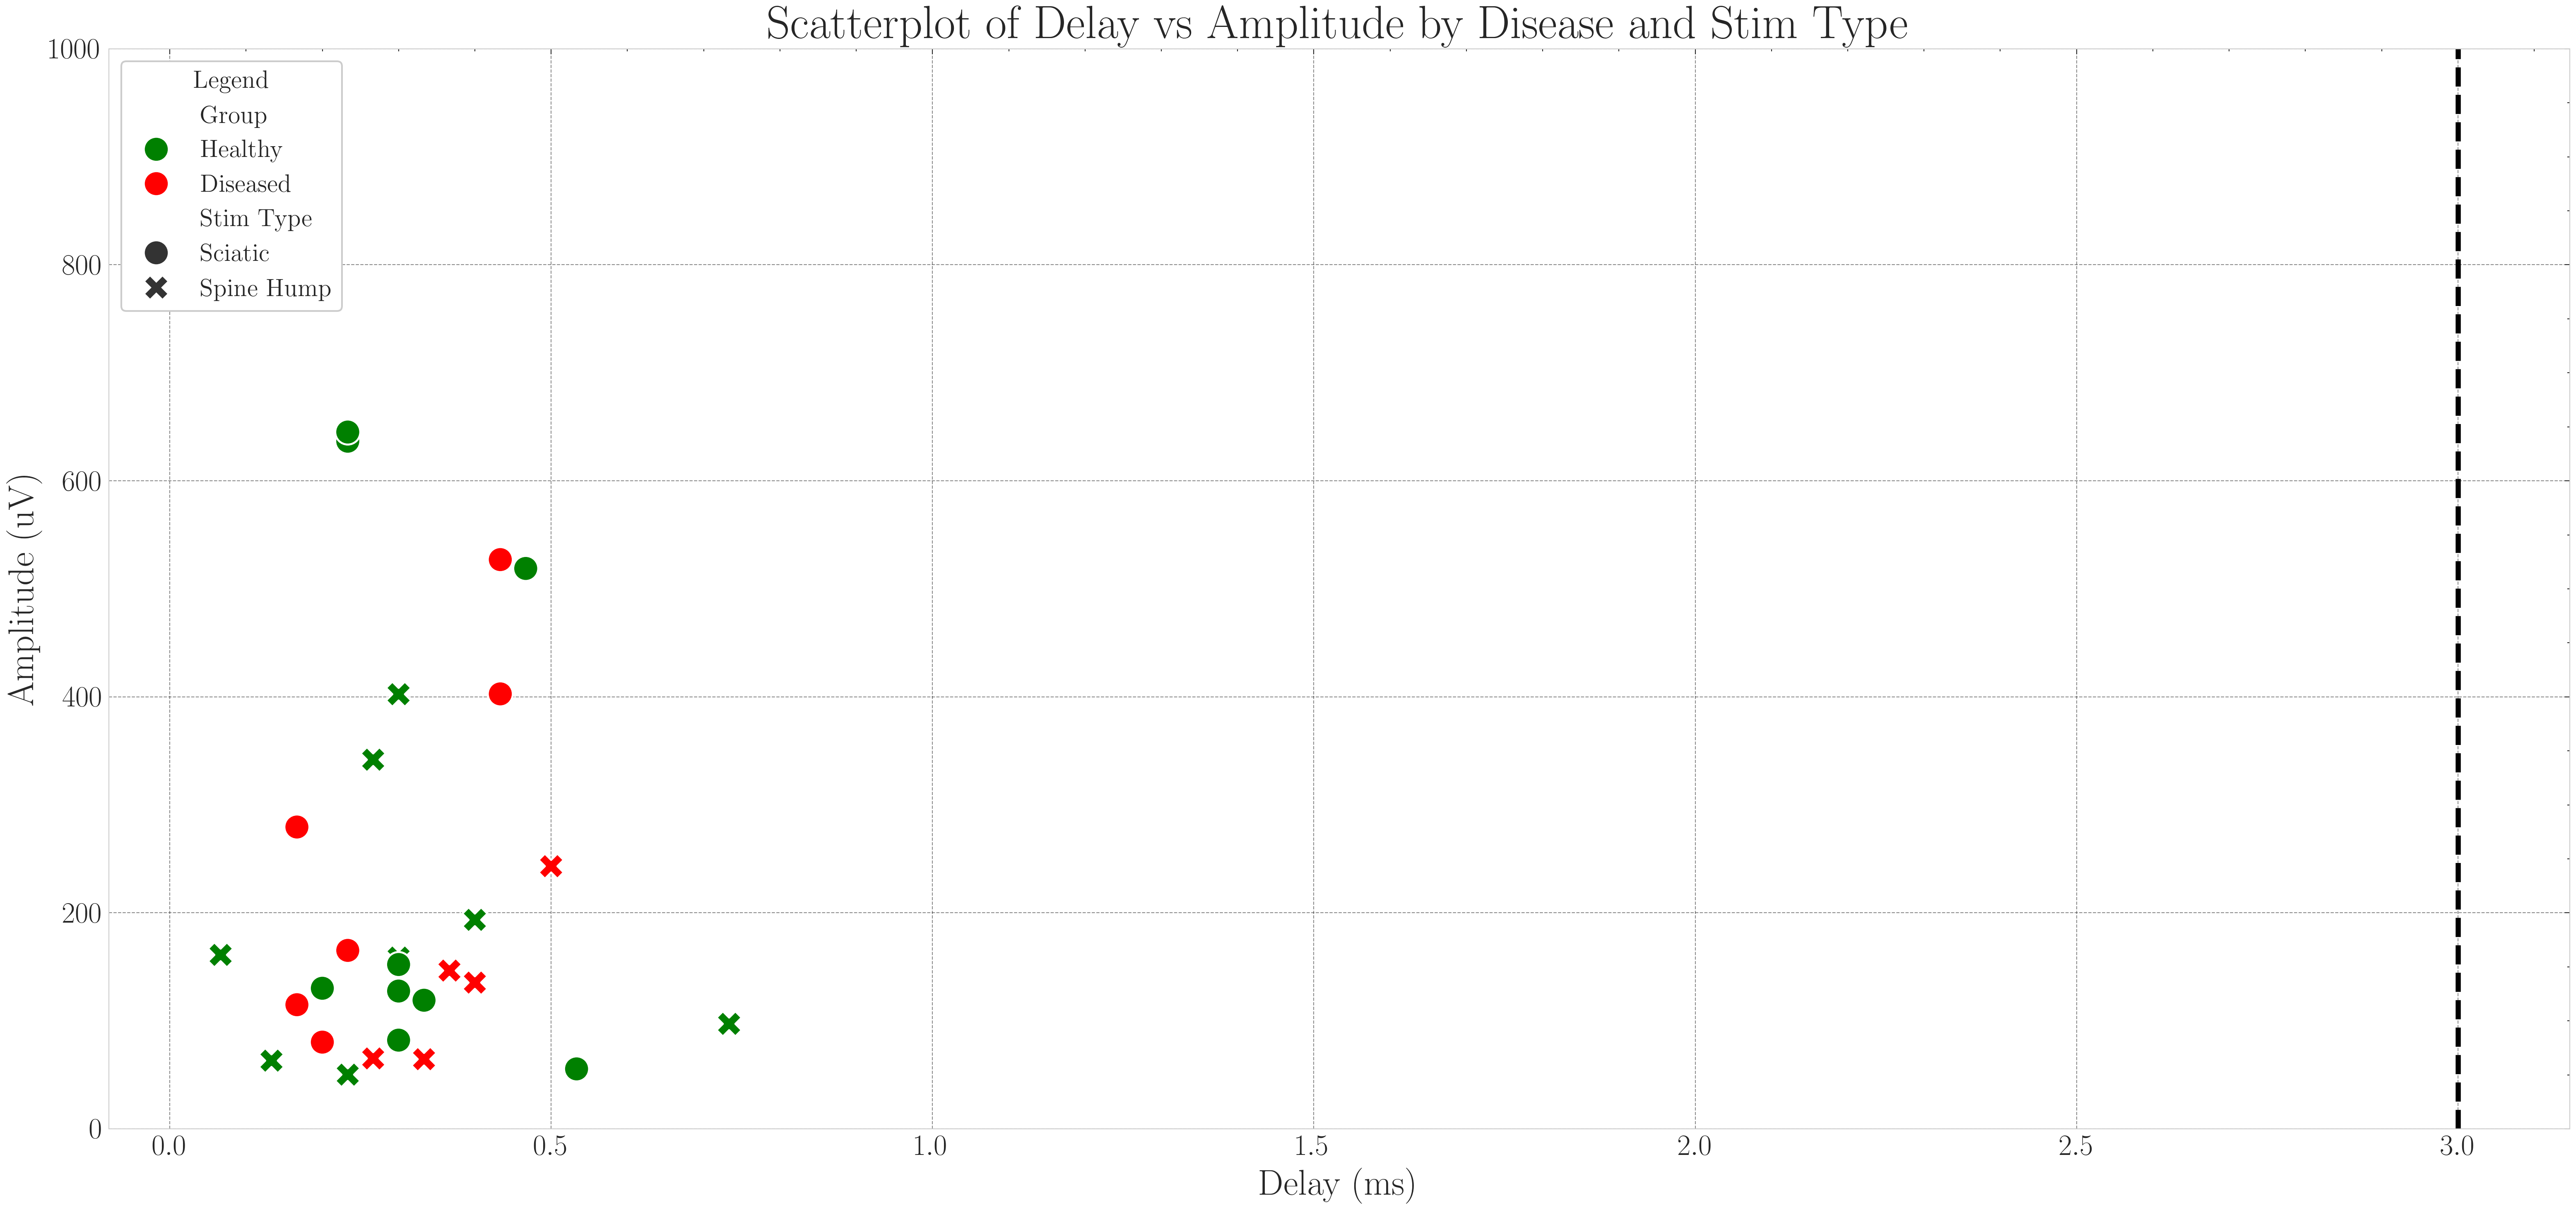

In [131]:
import seaborn as sns

# Initialize the figure
plt.figure(figsize=(21, 10), dpi=300)

custom_palette = {1: "green", 2: "red"}

sns.set_theme(style = None)
plt.style.use(['science', 'grid', 'vibrant'])
sns.scatterplot(
    data=final,
    x='delay',
    y='amplitude',
    hue='group',
    style='stim_type',
    palette=custom_palette,
    s=210
)

# vertical lines for expected delay
plt.axvline(x=3, color='black', linestyle='--', linewidth=3)

# titles and labels
plt.title("Scatterplot of Delay vs Amplitude by Disease and Stim Type", fontsize=27)
plt.xlabel("Delay (ms)", fontsize=21)
plt.xticks(fontsize=17)
plt.ylabel("Amplitude (uV)", fontsize=21)
plt.yticks(fontsize=17)
plt.ylim(0, 1000)

# legend
my_map = {'group':'Group', '1': 'Healthy', '2': 'Diseased', 'stim_type': 'Stim Type', 'sciatic': 'Sciatic', 'spine_hump': 'Spine Hump'}

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [my_map[l] for l in labels], title='Legend', title_fontsize='large', fontsize='large', loc='best')

plt.tight_layout()
plt.show()

## statistical tests

In [130]:
from scipy.stats import ttest_ind, mannwhitneyu, shapiro

group1_delays = final[final['group'] == 1]['delay']
group2_delays = final[final['group'] == 2]['delay']

shapiro_group1 = shapiro(group1_delays)
shapiro_group2 = shapiro(group2_delays)

print("Shapiro-Wilk test for Group 1 Delays: p-value =", shapiro_group1.pvalue)
print("Shapiro-Wilk test for Group 2 Delays: p-value =", shapiro_group2.pvalue)

# Determine if the data is normally distributed based on p-value > 0.05
if shapiro_group1.pvalue > 0.05 and shapiro_group2.pvalue > 0.05:
    # If data are approximately normal, use independent samples t-test
    t_stat, p_value = ttest_ind(group1_delays, group2_delays, equal_var=False)  # Welch's t-test
    print('Delays are normally distributed')
    print("Independent t-test p-value:", p_value)
else:
    # If data are not normally distributed, use Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(group1_delays, group2_delays, alternative='two-sided')
    print('Delays are not normally distributed')
    print("Mann-Whitney U test p-value:", p_value)

alpha = 0.05  
if p_value < alpha:
    print("The difference in delays between Group 1 and Group 2 is statistically significant.")
else:
    print("No statistically significant difference in delays between Group 1 and Group 2.")


Shapiro-Wilk test for Group 1 Delays: p-value = 0.07653266502371449
Shapiro-Wilk test for Group 2 Delays: p-value = 0.3934946649941473
Delays are normally distributed
Independent t-test p-value: 0.982091768829743
No statistically significant difference in delays between Group 1 and Group 2.
